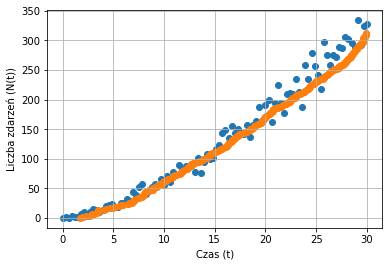

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def lambda_function(t):
    return 3*t**0.5

def niejednorodny_poiss(T, lambda_function, l):
    t = 0
    I = 0
    S = []
    while t <= T:
        U1 = np.random.random()
        t -= np.log(U1) / l
        if t > T:
            break
        U2 = np.random.random()
        if U2 <= lambda_function(t) / l:
            I += 1
            S.append(t)
    return S, I

def Poiss(l):
    U = np.random.uniform(0,1)
    j=0
    p = np.exp(-l)
    F = p
    while U > F:
        p = (p * l) / (j+1)
        F += p
        j += 1
    return j

T = 30
l = 3*T**0.5

t_values = np.linspace(0, T, 100)
poisson = [Poiss(quad(lambda_function, 0, t)[0]) for t in t_values]

S, I = niejednorodny_poiss(T, lambda_function, l)

plt.scatter(t_values, poisson)
plt.scatter(S, range(len(S)))
plt.xlabel('Czas (t)')
plt.ylabel('Liczba zdarzeń (N(t))')
plt.grid(True)
plt.show()
